The basic Neural Network has an INPUT, a HIDDEN, and an OUTPUT layer as shown in the figure above.

- INPUT - This is where you feed your model your data.
- HIDDEN - This is where all the "magic" happens.
- OUTPUT - This is where your model makes a prediction.


As data enters the model...

They are multiplied by weights and then a bias gets added to that calculation. The result of this calculation will then be your OUTPUT. So for example, if you had a model that predicts home prices based on the size of your home. Your INPUT will be the square footage of your house. Your model then will multiply this number by a Weight and then add it to a bias. The result of this calculation will be the home price predicted by your model. Pretty easy so far.

(Input) -- Weight * Input + Bian -- (Hidden Layer) --

How Does a Neural Network Learn?

You need to train your model in order for it to learn. Below are the ingredients you need to have in place to teach.

- Training data (which inlcudes the INPUT and OUTPUT values)
- Loss Function (this calculates how good or bad your model is making predictions)

Let's keep going with the home price example mentioned above. Suppose you gathered historical data from Zillow on home prices. You have two columns, one tells you the size of a house in square footage, and the other column is the price the home last sold for. This is what we call your training data. This is the data we are going to use to train our model with.

After the model makes a prediction as shown above, we need a way to determine how accurate the prediction was. This is where our loss function comes into play. It will tell the model that it was wrong and it needs to correct itself.

    So how exactly are the Weights and Bias numbers calculated?

These numbers are initialized with some random values. After the first training iteration, the loss function will tell the model how far off it is from the correct output. The model will then adjust the values for W (weight) and b (bias) so that its prediction on iteration 2 is better than on iteration 1. This is also called backpropagation.

    How does the model determine how much to adjust the W and b?

In the previous lessons, we have been using the Gradient Descent method. It is the Learning Rate that will determine how much of an adjustment to make on W and b. The larger the LR, the bigger the adjustment per iteration.

So after X number of iterations, your model has hopefully adjusted its Weights and bias numbers so that that the difference between its predicted values are very close to the actual values. After you have tuned your model, it is then ready to accept new data that is has NOT seeing before and give you an acurate prediction. 


Tunning Your Model

tune your model to make sure it is predicting as accurately as possible and doing it as fast as possible. There are a couple of parameters that you will have the opportunity to tweak for the Gradient Descent Optimizer.

    Learning Rate - Determines how fast your model will learn. The higher the number the faster it will learn.

    If you make the LR too high, your model might osilate between the same two values but never hit the local minimum (or the answer)

    If you make the LR too small, you might need significant more iterations to get to the local minimum

    Typical LR range: [0.001 - 1]

The goal is to choose the highest learning rate that will get you the local minimum with as few iterations as possible.

    Iterations - Determines the number of iterations you are going to run your model for. You may also hear this referred to as an epoch.

Consider plotting the error output against the number of iterations.

    Make sure the error it is decreasing in a consistent manner and decreasing after every iteration
    A flat line could mean you have found your answer

How many iterations are recommended?

    Depends on the problem, it could be a few, it could be many.

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import math
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Tensorflow version 1.2.1
Pandas version 0.20.1
Numpy version 1.12.1


In [3]:
# Create test data
# y = m * x + b

# let's generate 100 random samples
train_x = np.random.rand(100).astype(np.float32)

# let's compute y_data using 0.1 for m and 0.3 for b
train_y = 0.1 * train_x + 0.3

In [4]:
# placeholders
x = tf.placeholder(tf.float32, name="01_x")
y = tf.placeholder(tf.float32, name="01_y")

# variables
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = W * train_x + b

# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - train_y))
optimizer = tf.train.GradientDescentOptimizer(0.8)
train = optimizer.minimize(loss)

In [5]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(train_y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
# hold step and error values
t = []

# initialize the variables
init = tf.global_variables_initializer()

# run your graph
with tf.Session() as sess:
    sess.run(init)

    # fit the function.
    for step in range(200):
        # get your data
        train_data = {x:train_x, y:train_y}
        
        # training in progress...
        sess.run(train, feed_dict=train_data)
        
        # capture the step and error for analysis
        t.append((step, sess.run(loss, feed_dict=train_data)))        
            
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval({x: train_x, y: train_y}) )



Accuracy on the Training Set: 0.0


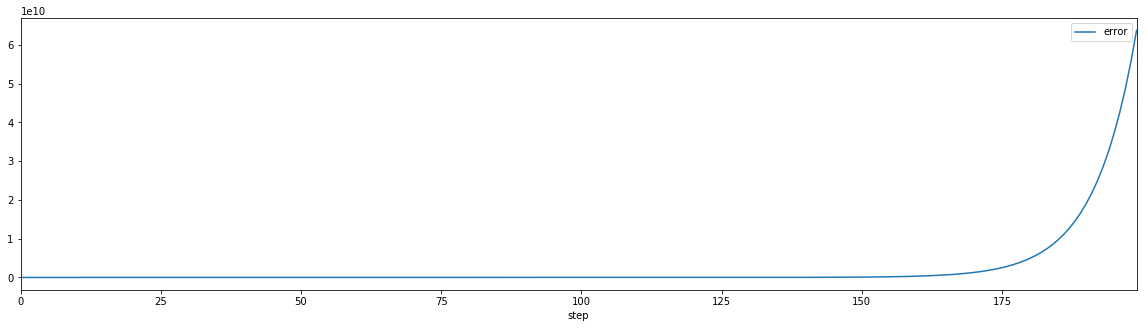

In [7]:
pd.DataFrame(t, columns=['step', 'error']).set_index('step').plot(figsize=(20,5));

Accuracy on the Training Set: 0.0
Training learning rate:  0.9
Accuracy on the Training Set: 0.0
Training learning rate:  0.8
Accuracy on the Training Set: 1.0
Training learning rate:  0.5
Accuracy on the Training Set: 1.0
Training learning rate:  0.2
Accuracy on the Training Set: 1.0
Training learning rate:  0.1
Accuracy on the Training Set: 1.0
Training learning rate:  0.001


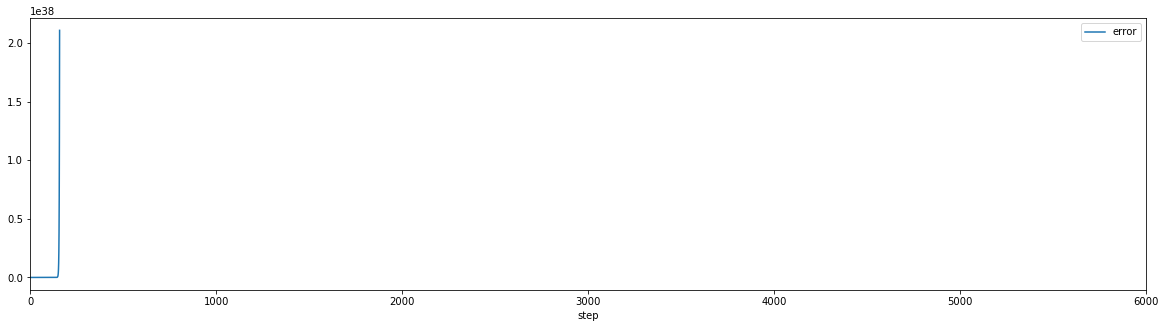

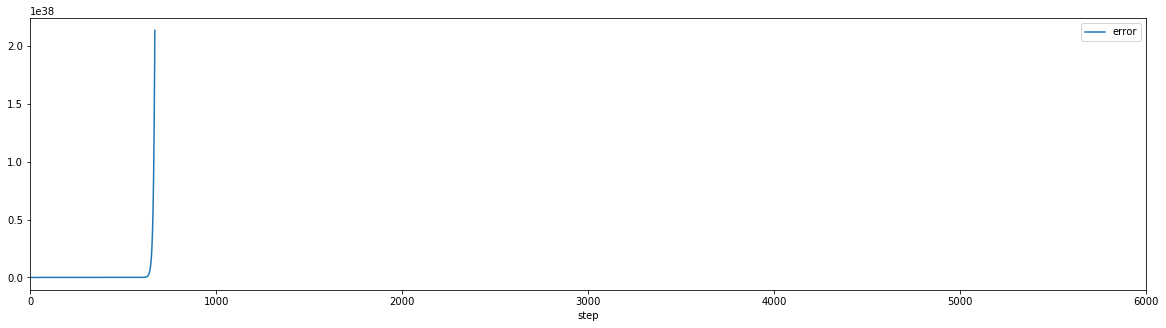

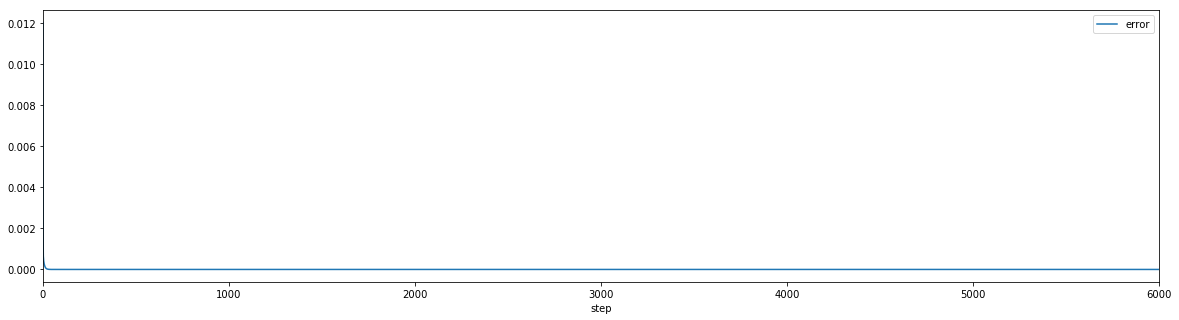

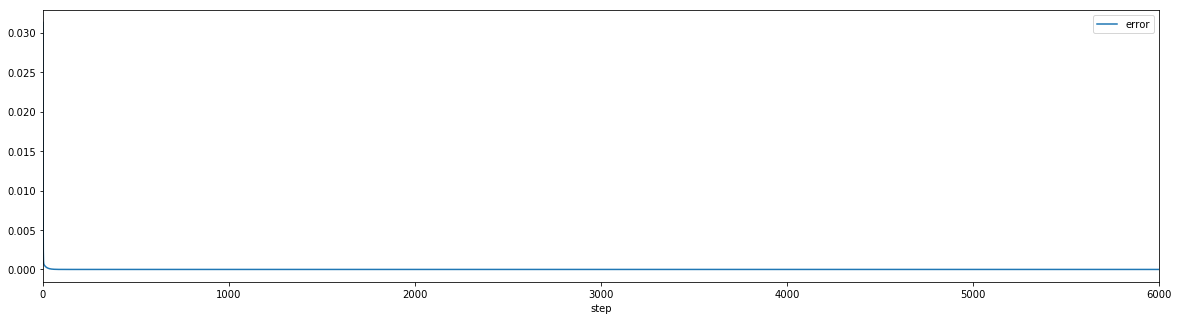

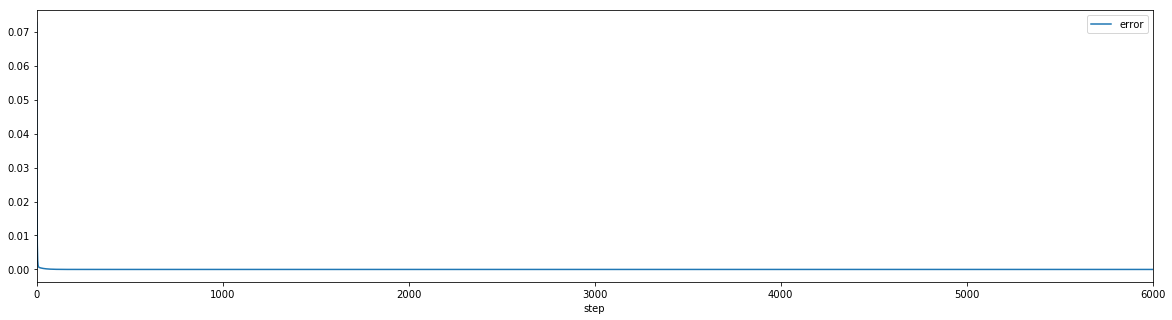

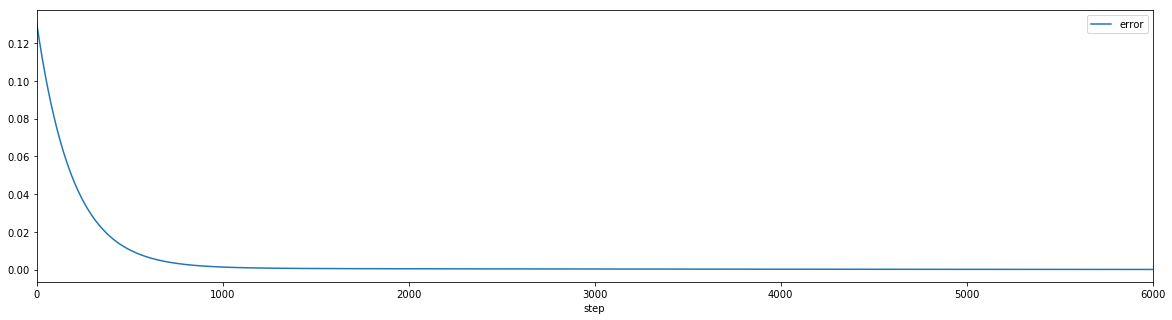

In [12]:
learning_rate = [0.9, 0.8, 0.5, 0.2, 0.1, 0.001]
epoch = 6000

for lr in learning_rate:
    # minimize the mean squared errors.
    loss = tf.reduce_mean(tf.square(pred - train_y))
    optimizer = tf.train.GradientDescentOptimizer(lr)
    train = optimizer.minimize(loss)
    
     #check accuracy of model
    correct_prediction = tf.equal(tf.round(pred), tf.round(train_y))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # hold step and error values
    t = []

    # initialize the variables
    init = tf.global_variables_initializer()

    # run your graph
    with tf.Session() as sess:
        sess.run(init)

        # fit the function.
        for step in range(epoch):
            # get your data
            train_data = {x:train_x, y:train_y}

            # training in progress...
            sess.run(train, feed_dict=train_data)

            # capture the step and error for analysis
            t.append((step, sess.run(loss, feed_dict=train_data)))        

        # here is where you see how good of a Data Scientist you are        
        print("Accuracy on the Training Set:", accuracy.eval({x: train_x, y: train_y}) )
    print("Training learning rate: " , lr)
    pd.DataFrame(t, columns=['step', 'error']).set_index('step').plot(figsize=(20,5));